In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# 테스트를 위해 랜덤한 파라미터를 샘플링
def make_random_params(param_range):
    # 1차 함수 샘플링
    return np.random.randint(1, param_range+1, size=2).astype('float')

# 함수값 계산
def cal_func(params, x_index):
    x_values = [x_index**i for i in range(len(params))]
    return params.dot(x_values)

# 함수값을 기반으로 랜덤한 데이터를 만들기
def make_random_points(params, points_num):
    picked_x = np.random.choice(np.arange(-20, 21), points_num, replace=False).astype('float')
    picked_y = cal_func(params, picked_x).astype('float')
    randomized_picked_y = picked_y*(np.random.rand(points_num)+0.5)
    print('==============')
    print(f'params : {params}')
    print(f'picked_x : {picked_x}')
    print(f'randomized_picked_y : {randomized_picked_y}')
    return picked_x, randomized_picked_y

# 손실함수, 코스트 계산
def loss_func(temp_param, picked_x, picked_y):
    temp_cal = cal_func(temp_param, picked_x)
    return sum(((picked_y - temp_cal)**2)/(len(picked_x)*2))

# 미분
def grad_func(target_func, target_param, param_val, picked_x, picked_y):
    lambda_grad = 1e-6
    changed_val = param_val.copy()
    changed_val[target_param] += lambda_grad

    return (target_func(changed_val, picked_x, picked_y) - target_func(param_val, picked_x, picked_y))/lambda_grad

# 경사하강법 시행
def gradient_decent(param_range, points_num, init_params, alpha, limit_alpha, epochs):
    params = make_random_params(5)
    picked_x, randomized_picked_y = make_random_points(params, points_num)
    min_cost = np.inf
    min_param = []
    cnt = 0
    while True:
        if cnt > epochs or alpha < limit_alpha:
            plt.plot(picked_x, randomized_picked_y, '.')
            plt.plot([-20, 20], cal_func(min_param, np.array([-20, 20])), 'r')
            return min_param, min_cost
        
        cost = loss_func(init_params, picked_x, randomized_picked_y)
        
        print('=====================')
        print(f'param = {init_params}')
        print(f'cost = {cost}')
        print(f'alpha = {alpha}')
        grad = np.array([])
        for i in range(len(init_params)):
             grad = np.append(grad, grad_func(loss_func, i, np.zeros(2, 'float'), picked_x, randomized_picked_y))
                
        if cost < min_cost:
            min_cost = cost
            min_param = np.copy(init_params)
            init_params -= alpha*grad
        
        else:
            alpha /= 2
        
        
        cnt += 1

params : [3. 2.]
picked_x : [ -8.  -6. -17.  -7.  -2.  10.  11. -10.  19.   9. -19. -13. -11.  17.
   8.  13.   7.   1.  16.  14.]
randomized_picked_y : [ -6.77596131  -9.40360166 -36.04392111 -15.10162772  -0.8457966
  17.83445824  25.90015665 -24.55354147  29.2804808   19.44126894
 -36.55410806 -24.7291952  -19.08362178  48.01977538  17.56339831
  19.02107513  21.77256052   4.0957777   23.4220378   22.86204152]
param = [0. 0.]
cost = 283.48825666291043
alpha = 0.001
param = [0.00380608 0.27761147]
cost = 211.95622403512323
alpha = 0.001
param = [0.00761216 0.55522294]
cost = 151.52539770444724
alpha = 0.001
param = [0.01141825 0.83283442]
cost = 102.19577767088235
alpha = 0.001
param = [0.01522433 1.11044589]
cost = 63.967363934428704
alpha = 0.001
param = [0.01903041 1.38805736]
cost = 36.840156495086205
alpha = 0.001
param = [0.02283649 1.66566883]
cost = 20.814155352854886
alpha = 0.001
param = [0.02664258 1.94328031]
cost = 15.889360507734741
alpha = 0.001
param = [0.03044866 2.2

(array([0.02664258, 1.94328031]), 15.889360507734741)

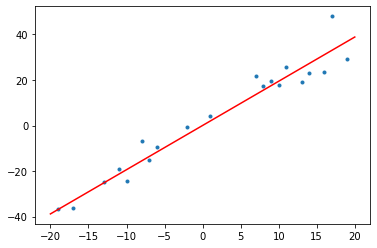

In [18]:
gradient_decent(5, 20, np.zeros(2, 'float'), 1e-3, 1e-30, 200)